In [21]:
# ML

# supervised - 예측모델 : 예측대상 - y,target, label
# y : 불연속값 - classification(분류분석) : logisticregression, knnclassifier, svclassifier, decisiontreeclassifier, ensemble
#       연속값 - regression(회귀분석) : linearrgression.knnregressor, svcregressor, decisiontreeregressor, ensemble regressor

# unsupervised - 예측모델 x, 예측대상 없음 - 5%
    # clustering(군집분석..)
    
# 실험할땐 분류 , 현실에 적용할땐 예측 

In [ ]:
# # train test split 
# # 수퍼바이즈드를 기본으로 설명하면 위에나온 알고리즘중 하나를 씀 .. 그래서 sk런에서 가져다쓸것
# # 알고리즘을 우리가 짜는게아니라 데이터를 넣어주는것이 핵심 

# data eda/preprocessing 
# > y(target), x(input) divide 
# > x_train,x_test,y_train,y_test = train_test_split(x,y)
# > algorithm import 
# > algorithm.fit(x_train,y_train) : 모델을 학습 시 사용데이터 (train)
# => model
# > preds = model.predict(x_test) : 모델이 예측하고 예측결과를 평가 .. (test)
# > preds vs y_test : test data 

# 파이넌스쪽에선 정제된 데이터가 계속 쏟아짐 많은데이터를 구하기 쉽지 않음. 
# 라벨링이안되있거나 데이터수가적으면 머신러닝 할 수 없음 
# knn - k개를 몇개를 뽑느냐에따라 자세해질수도있고 단순해질수도있음. 

In [56]:
# 판다스, 넘파이 , 매트플롯라이브러리 파이플롯 , 시본 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [65]:
# Classified Data 를 데이터프레임으로 읽어오기
df = pd.read_csv('./data/ml_source_files/Classified Data', index_col= 0) # 열을 인덱스로 옮기기..
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [71]:
# x,y 를 define 
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS',axis=1)

In [72]:
# train data, test data split 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 111)

In [73]:
# Algorithm import 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [74]:
# Algorithm train 알고리즘에게 훈련데이터(input,label)을 넣어서 데이터를 통해 학습하고
# 결과적으로 라벨(타겟)을 분류(예측)하는 모델을 생성하는 과정 
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
# prediction :훈련에 사용되지않은 새로운 데이터로 평가해야함 
preds = knn.predict(x_test)
preds 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [81]:
# evaluation : preds vs y_test 
knn.score(x_test,y_test) 
# 피쳐랑 결과값을 비교해서 스코어 내주는것 

0.535

In [82]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        97
           1       0.55      0.50      0.53       103

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



In [84]:
# 가장적합한 k값 찾기
accuracy_list = []
for k in range(1,100):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train,y_train)
    acc = knn.score(x_test,y_test)
    accuracy_list.append(acc)
accuracy_list

[0.6,
 0.5,
 0.52,
 0.49,
 0.535,
 0.505,
 0.525,
 0.51,
 0.53,
 0.525,
 0.585,
 0.58,
 0.605,
 0.57,
 0.63,
 0.565,
 0.595,
 0.585,
 0.585,
 0.605,
 0.595,
 0.605,
 0.605,
 0.585,
 0.59,
 0.58,
 0.565,
 0.585,
 0.56,
 0.555,
 0.56,
 0.575,
 0.565,
 0.555,
 0.56,
 0.565,
 0.56,
 0.575,
 0.57,
 0.58,
 0.58,
 0.55,
 0.585,
 0.56,
 0.585,
 0.565,
 0.6,
 0.555,
 0.55,
 0.555,
 0.55,
 0.55,
 0.54,
 0.555,
 0.565,
 0.57,
 0.585,
 0.575,
 0.575,
 0.575,
 0.58,
 0.565,
 0.57,
 0.56,
 0.565,
 0.555,
 0.555,
 0.575,
 0.57,
 0.61,
 0.565,
 0.565,
 0.54,
 0.545,
 0.515,
 0.54,
 0.53,
 0.57,
 0.555,
 0.515,
 0.535,
 0.525,
 0.495,
 0.525,
 0.515,
 0.54,
 0.535,
 0.525,
 0.535,
 0.53,
 0.535,
 0.52,
 0.535,
 0.52,
 0.535,
 0.52,
 0.525,
 0.515,
 0.525]

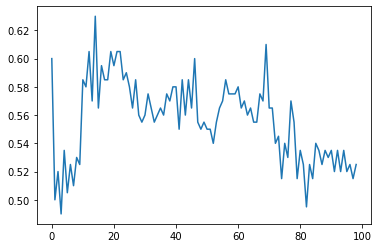

In [85]:
# pyplot으로 적합한 k값 시각화
plt.plot(accuracy_list)

In [86]:
# axis에 해당하는 값들 중 가장 큰 값의 인덱스들을 반환하는 함수
np.array(accuracy_list).argmax()

14

In [87]:
#ㄱ가장 적합한 k값으로 분류하기 
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train,y_train)
preds = knn.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.54      0.69      0.61        97
           1       0.61      0.46      0.52       103

    accuracy                           0.57       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.57      0.56       200



In [25]:
# binary classification 

In [26]:
# x,y를 define

In [27]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis =1)

In [28]:
# train data , test data split 

In [29]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state=77)

In [30]:
# Algorithm import 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [32]:
# Algorithm train  : 
# 알고리즘에게 훈련데이터(input, label)를 넣어서 알고리즘이 데이터를 통해 학습하고 
# 결과적으로 데이터를 통해 라벨(타겟)을 분류(예측)하는 모델을 생성하는 과정 

In [33]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
# prediction : 훈련에 사용되지 않은 새로운 데이터로 평가해야 

In [35]:
preds = knn.predict(x_test) 

In [36]:
# evaluation : preds vs y_test

In [37]:
knn.score(x_test,y_test) # preds를 안넣고 x_test를 넣으면 predict해서 score넣어줌

0.96

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       101
           1       0.95      0.97      0.96        99

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [39]:
# k =? 최적의 파라미터값, k값을 찾아보자 

In [88]:
accuracy_list = []
for k in range(1,100):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    acc = knn.score(x_test,y_test)
    accuracy_list.append(acc)
    
accuracy_list

[0.6,
 0.5,
 0.52,
 0.49,
 0.535,
 0.505,
 0.525,
 0.51,
 0.53,
 0.525,
 0.585,
 0.58,
 0.605,
 0.57,
 0.63,
 0.565,
 0.595,
 0.585,
 0.585,
 0.605,
 0.595,
 0.605,
 0.605,
 0.585,
 0.59,
 0.58,
 0.565,
 0.585,
 0.56,
 0.555,
 0.56,
 0.575,
 0.565,
 0.555,
 0.56,
 0.565,
 0.56,
 0.575,
 0.57,
 0.58,
 0.58,
 0.55,
 0.585,
 0.56,
 0.585,
 0.565,
 0.6,
 0.555,
 0.55,
 0.555,
 0.55,
 0.55,
 0.54,
 0.555,
 0.565,
 0.57,
 0.585,
 0.575,
 0.575,
 0.575,
 0.58,
 0.565,
 0.57,
 0.56,
 0.565,
 0.555,
 0.555,
 0.575,
 0.57,
 0.61,
 0.565,
 0.565,
 0.54,
 0.545,
 0.515,
 0.54,
 0.53,
 0.57,
 0.555,
 0.515,
 0.535,
 0.525,
 0.495,
 0.525,
 0.515,
 0.54,
 0.535,
 0.525,
 0.535,
 0.53,
 0.535,
 0.52,
 0.535,
 0.52,
 0.535,
 0.52,
 0.525,
 0.515,
 0.525]

In [48]:
plt.plot(accruacy_list)

NameError: name 'accruacy_list' is not defined

In [49]:
np.array(accuracy_list)

array(0.91)

In [50]:
knn = KneighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
preds = knn.predict(x_test)
print(classification_report(y_test, preds))

NameError: name 'KneighborsClassifier' is not defined